# Interactive Quality Control (QC) of an ECG and MRI Prediction Model

In this notebook, we review phenotypes and model results to identify where our model has room for improvement. This is a quality control (QC) step in the development of a model.

<div class="alert alert-block alert-info">

<p>Machine learning engineers work <b>iteratively</b> with domain experts, such as <b>cardiologists</b>, to understand how well the model is performing, and to enumerate the situations in which it needs <b>improvement</b>.</p>

</div>

# Setup

<div class="alert alert-block alert-warning">
    This notebook assumes <b>Terra</b> is running custom Docker image <kbd>ghcr.io/broadinstitute/ml4h/ml4h_terra:20210104_224422</kbd>.
</div>

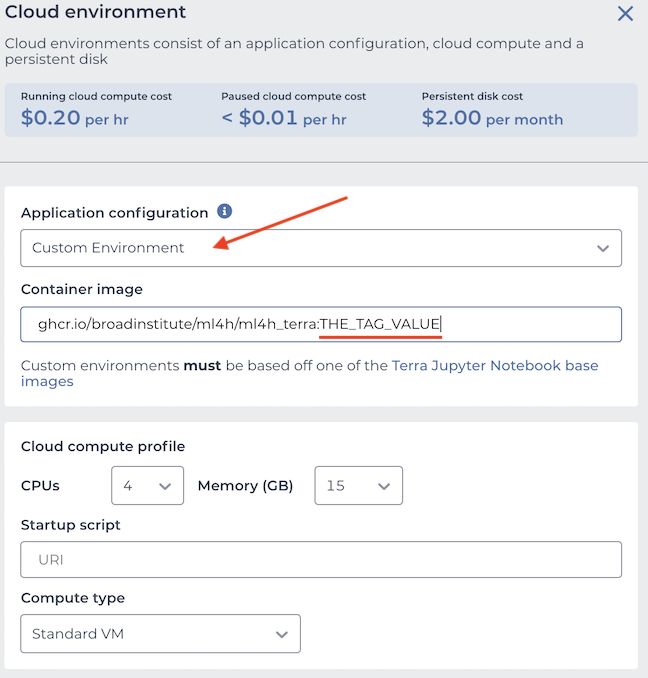

In [ ]:
from ml4h.visualization_tools.facets import FacetsOverview, FacetsDive  # Interactive data exploration of tabular data.
import pandas as pd
import tensorflow as tf

In [ ]:
%%javascript
// Display cell outputs to full height (no vertical scroll bar)
IPython.OutputArea.auto_scroll_threshold = 9999;

In [ ]:
MODEL_RESULTS_FILE = 'gs://fc-500bd872-4a53-45c9-87d3-39656bd83f85/data/synthetic_pheno_and_results.csv'

In [ ]:
patient_info = pd.read_csv(tf.io.gfile.GFile(MODEL_RESULTS_FILE))

patient_info.shape

# Look for problems with the model

<div class="alert alert-block alert-info">

<p>Using Facets Overview and Facets Dive, <b>pretend to be a cardiologist</b> examining a batch of model results to provide feedback to the machine learning engineers. Examine the <b>tabular data</b>. Look for charateristics in common for those patients for which the model is performing poorly.</p>

<b>Premise</b>
    <ul>
        <li>The model takes as input phenotypes, ECGs, and MRIs.</li>
        <li>The model emit predictions for:</li>
        <ul>
            <li><a href='https://en.wikipedia.org/wiki/QT_interval'>QT interval</a></li>
            <li><a href='https://en.wikipedia.org/wiki/P_wave_(electrocardiography)'>P axis</a></li>
            <li><a href='https://en.wikipedia.org/wiki/MRI_sequence#PD'>Proton density</a> liver adipose tissue fraction</li>
        </ul>
        <li>BMI is not currently an input to our model.</li>
        <li>Exercise effort is not currently an input to our model.</li>
    </ul>
</div>


<div class="alert alert-block alert-danger">

<p>NOTE: this is <a href='https://github.com/broadinstitute/ml4h/blob/master/notebooks/terra_featured_workspace/generate_synthetic_tabular_data.ipynb'><b>synthetic data</b></a>, with specific model errors are baked in. Can you find them? The solution is below.</p>
</div>

## SOLUTION

Use the arrow to the left of this section heading to expand this section and see the solution.

<div class="alert alert-block alert-warning">

<b>Observations that could be made:</b>
    <ol>
        <li>We can see that the model often gets the P axis prediction wrong for higher BMI individuals. Plot <kbd>p_axis_delta</kbd> vs. <kbd>bmi</kbd> using Facets Dive and you will see the skew.</li>
        <li>We can see that the model often gets the QT interval prediction wrong when the person did not exercise very hard. There is more error for lower speed bike ECGs because they typically result in a lower average load during the exercise phase. Plot <kbd>qt_interval_prediction</kbd> vs. <kbd>qt_interval_actual</kbd> coloring by <kbd>ecg_exercise_program</kbd> using Facets Dive and you will see the skew.</li>
        <li>We can see that the model often gets the liver visceral adipose fraction (proton density fat) prediction wrong for higher BMI individuals. Plot <kbd>proton_density_fat_delta</kbd> vs. <kbd>bmi</kbd> using Facets Dive and you will see the skew.</li>
    </ol>

<p><b>Outcome:</b> after review of model inputs and predictions, we realize that BMI and ECG exercise program should be added to the model inputs.</p>

<p>Remember, this is <a href='https://github.com/broadinstitute/ml/blob/master/notebooks/terra_featured_workspace/generate_synthetic_tabular_data.ipynb'><b>synthetic data</b></a> so some relationships you may expect to see between the variables if this were real data may not be present here.</p>

</div>

## Visualizing model inputs and outputs

Use this Facets Overview visualization to get an overview of the type and distribution of patient information available. For detailed instructions, see [Facets Overview](https://pair-code.github.io/facets/).

This [synthetic data](https://github.com/broadinstitute/ml4h/blob/master/notebooks/terra_featured_workspace/generate_synthetic_tabular_data.ipynb) attempts to have a similar distribution to that of the real UK Biobank data:
* [Sex](http://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=31)
* [Body mass index (BMI)](http://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=21001)
* [ECG during exercise program category](http://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=6024)
* [P axis](http://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=22335)
* [QT interval](http://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=22331)
* [Proton density fat fraction](http://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=22402)

In [ ]:
FacetsOverview(patient_info)

## Visualizing model behavior

Use this Facets Dive visualization to get an overview the distributions of values for *groups* of patients. For detailed instructions, see [Facets Dive](https://pair-code.github.io/facets/). Keep in mind that this [synthetic data](https://github.com/broadinstitute/ml4h/blob/master/notebooks/terra_featured_workspace/generate_synthetic_tabular_data.ipynb) may not exhibit some patterns that one would expect to find in real data.

**Tips**:
* It might take a few seconds for the visualization to appear.
* If the table of contents pane is in the way of the column selector drop down, click on the button to turn the table of contents off.
* Zoom in, click on the patient(s) of interest and you'll see a pane on the right hand side with all the data for the patient.

In [ ]:
FacetsDive(patient_info)

# Provenance

In [ ]:
import datetime
print(datetime.datetime.now())

In [ ]:
%%bash
pip3 freeze

Questions about these particular notebooks? Join the discussion https://github.com/broadinstitute/ml4h/discussions.